In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [5]:
data = pd.read_csv("Phishing_Legitimate_full.csv")
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [6]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)
data.sample(5)


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
6934,6935,2,0,2,129,3,0,0,0,0,8,2,1,0,15,1,0,0,0,0,0,13,7,101,0,0,0,0.343949,0.600000,0,1,0,0,0,0.000000,0,0,0,0,0,1,0,0,1,-1,-1,1,0,0,0
5026,5027,1,0,0,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,1,0,0,0,0,0.009346,0.061728,0,1,1,0,0,0.009346,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0
6680,6681,2,1,5,64,5,0,0,0,0,0,0,0,0,20,1,1,0,0,0,0,21,36,0,0,0,0,0.048193,0.333333,0,1,0,0,0,0.012048,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2880,2881,2,0,4,60,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,9,44,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1
3020,3021,2,1,3,42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,14,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1


In [7]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

<Axes: xlabel='labels'>

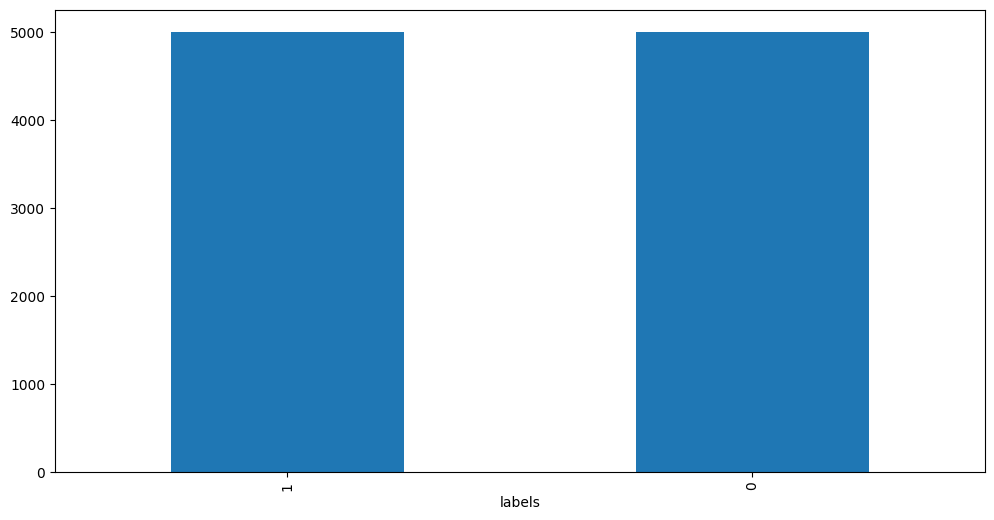

In [8]:
data['labels'].value_counts().plot(kind='bar')

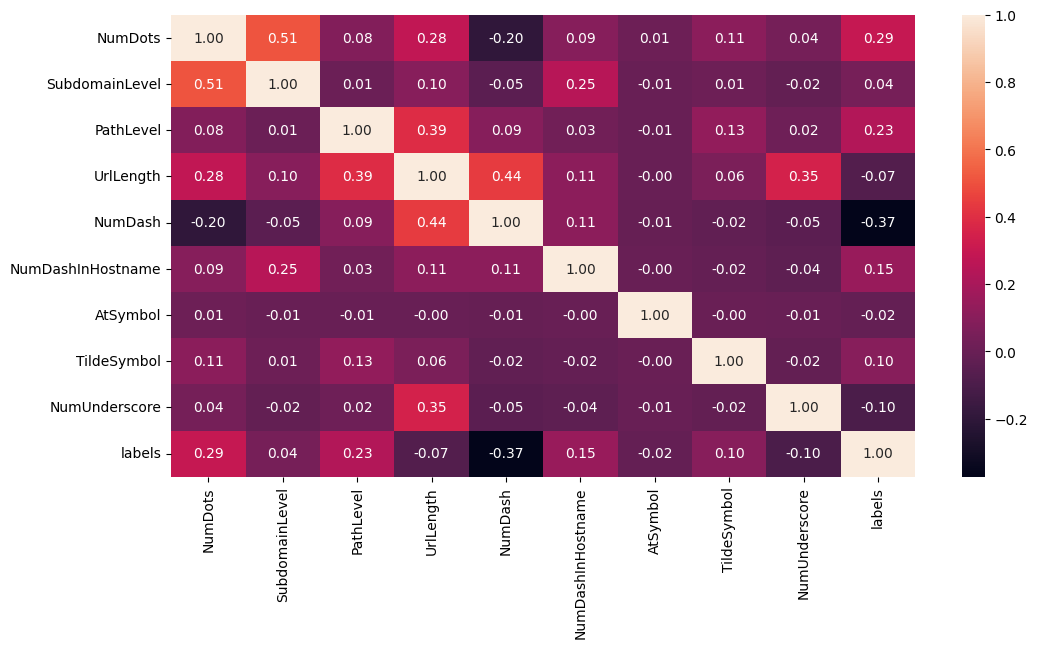

In [13]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()
corr_heatmap(data, 0, 10)



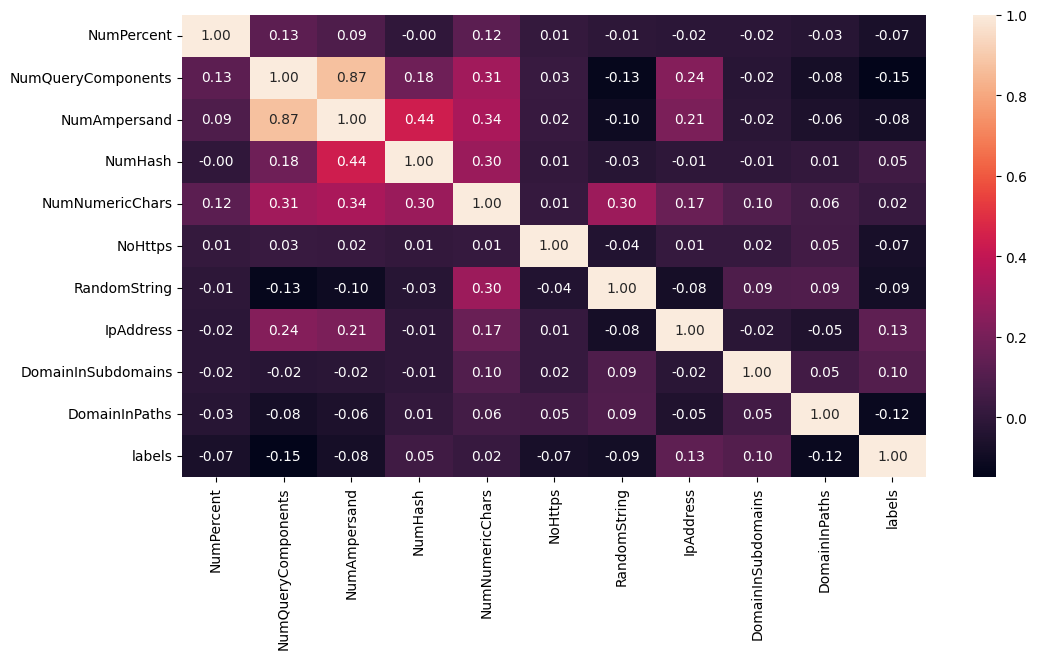

In [14]:
corr_heatmap(data, 10, 20)

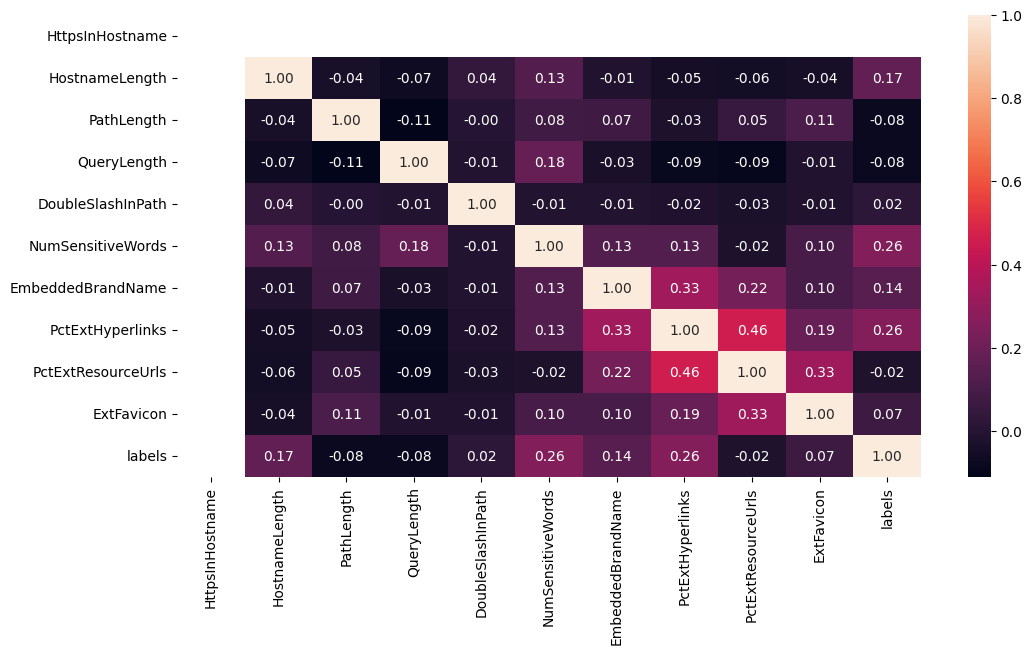

In [15]:
corr_heatmap(data, 20, 30)

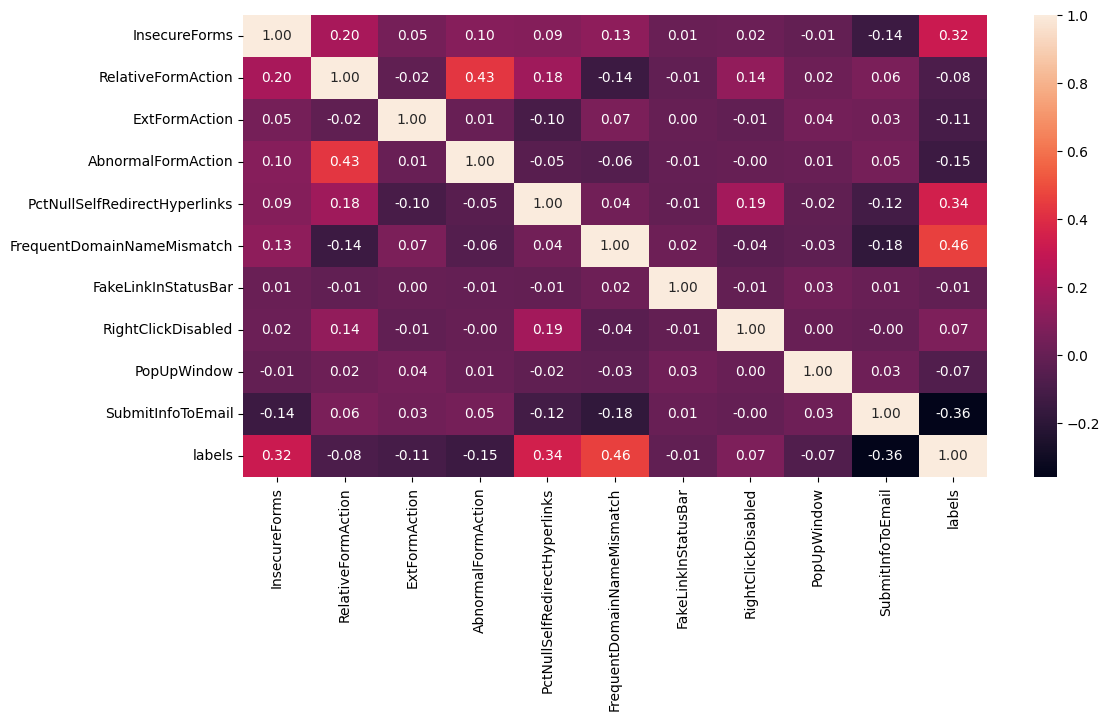

In [16]:
corr_heatmap(data, 30, 40)

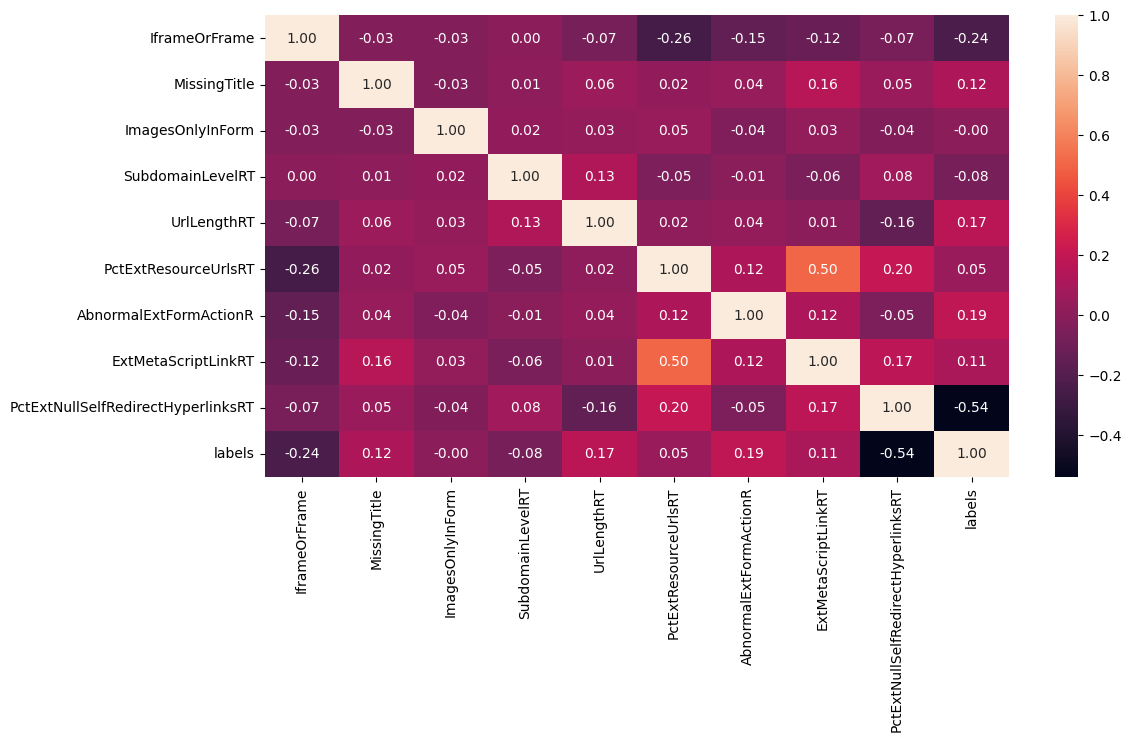

In [17]:
corr_heatmap(data, 40, 50)

In [18]:
from sklearn.feature_selection import mutual_info_classif
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.638318e-01
PctExtResourceUrls                    2.960930e-01
PctNullSelfRedirectHyperlinks         2.331113e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

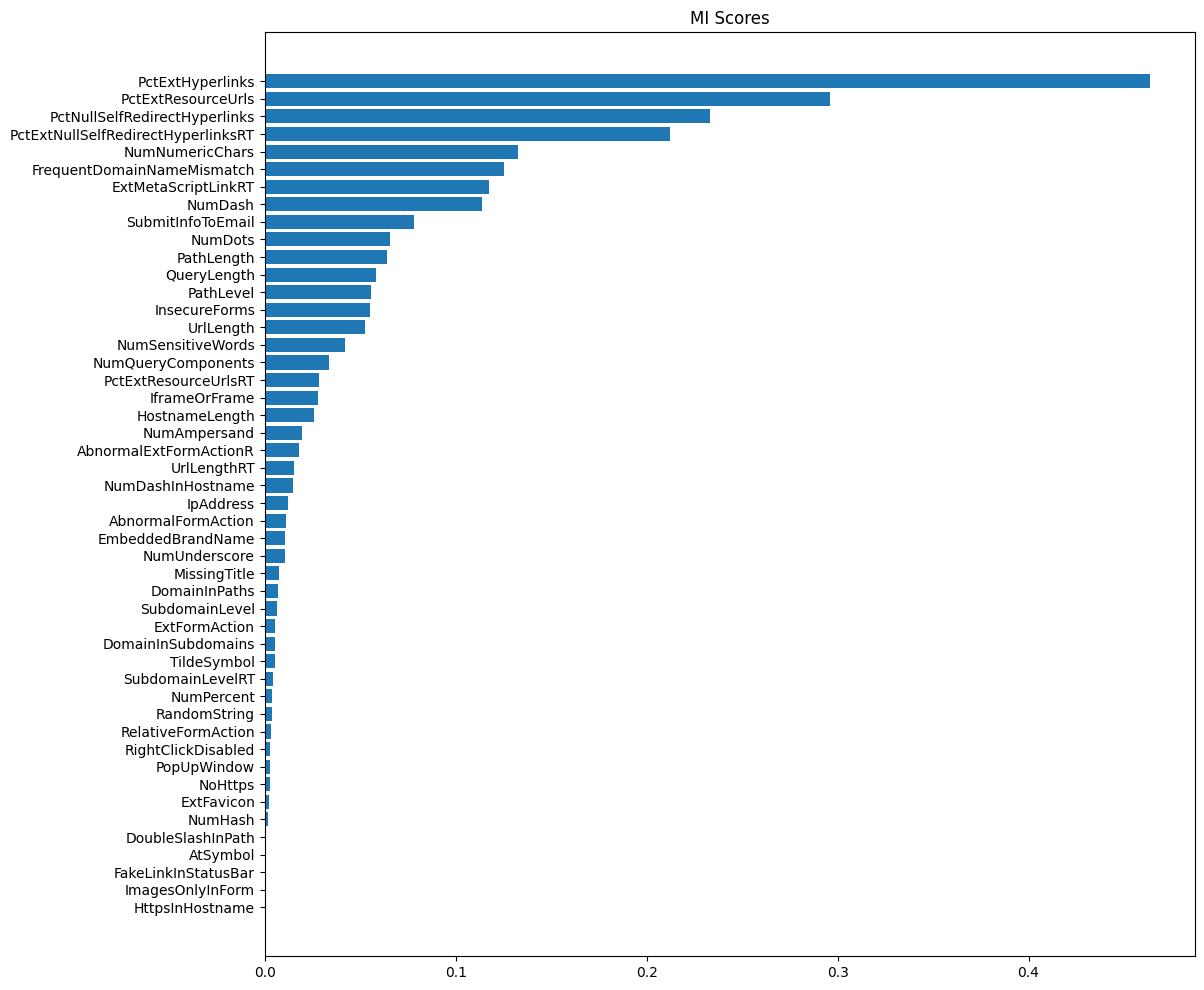

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [22]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [23]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision :{}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall,f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])


Performance for Logistic Model with Top 20 features is precision :0.9038652130822596, recall : 0.9363449691991786, f1 score : 0.9198184568835098, accuracy : 0.9205
Performance for Logistic Model with Top 21 features is precision :0.9164265129682997, recall : 0.9380530973451328, f1 score : 0.9271137026239067, accuracy : 0.925
Performance for Logistic Model with Top 22 features is precision :0.9198113207547169, recall : 0.9420289855072463, f1 score : 0.9307875894988067, accuracy : 0.9275
Performance for Logistic Model with Top 23 features is precision :0.92725509214355, recall : 0.9437314906219151, f1 score : 0.9354207436399217, accuracy : 0.934
Performance for Logistic Model with Top 24 features is precision :0.9374389051808406, recall : 0.930164888457808, f1 score : 0.9337877312560857, accuracy : 0.932
Performance for Logistic Model with Top 25 features is precision :0.898238747553816, recall : 0.9473684210526315, f1 score : 0.922149673530889, accuracy : 0.9225
Performance for Logistic

In [24]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall','f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.903865,0.936345,0.919818,0.9205
1,21,0.916427,0.938053,0.927114,0.9250
2,22,0.919811,0.942029,0.930788,0.9275
3,23,0.927255,0.943731,0.935421,0.9340
4,24,0.937439,0.930165,0.933788,0.9320
5,25,0.898239,0.947368,0.922150,0.9225
6,26,0.918738,0.945866,0.932105,0.9300
7,27,0.929534,0.945205,0.937304,0.9400
8,28,0.927165,0.948640,0.937780,0.9375
9,29,0.916830,0.949341,0.932802,0.9325


<Axes: xlabel='num_of_features', ylabel='precision'>

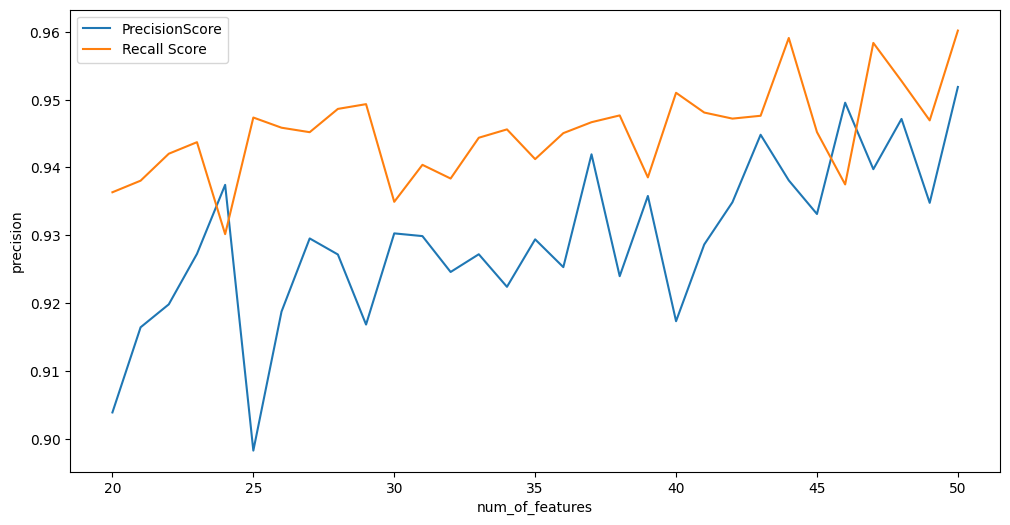

In [25]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='PrecisionScore')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')


In [26]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    rfc = RandomForestClassifier(n_estimators=500, max_depth=32,max_features=1.0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [27]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {},recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1,accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision : 0.9692154915590864,recall : 0.9779559118236473, f1 score : 0.97356608478803, accuracy : 0.9735
Performance for RFC Model with Top 21 features is precision : 0.9634748272458046,recall : 0.9828801611278952, f1 score : 0.9730807577268196, accuracy : 0.973
Performance for RFC Model with Top 22 features is precision : 0.9683301343570058,recall : 0.9834307992202729, f1 score : 0.9758220502901354, accuracy : 0.975
Performance for RFC Model with Top 23 features is precision : 0.9715639810426541,recall : 0.9818007662835249, f1 score : 0.9766555502620295, accuracy : 0.9755
Performance for RFC Model with Top 24 features is precision : 0.9729458917835672,recall : 0.9768611670020121, f1 score : 0.9748995983935743, accuracy : 0.975
Performance for RFC Model with Top 25 features is precision : 0.9788306451612904,recall : 0.9680957128614157, f1 score : 0.9734335839598998, accuracy : 0.9735
Performance for RFC Model with Top 26 features is p

<Axes: xlabel='num_of_features', ylabel='precision'>

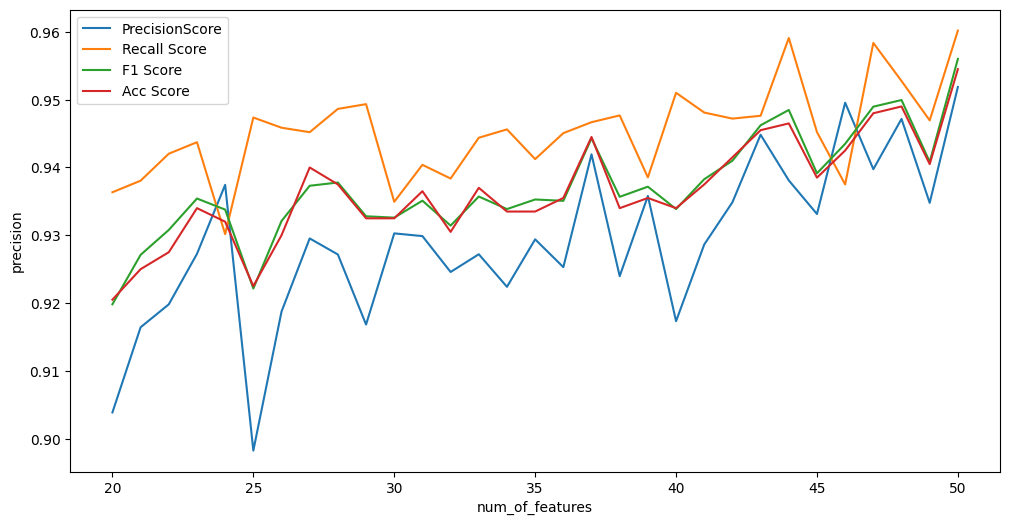

In [28]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='PrecisionScore')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [30]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
rfc = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=1.0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [31]:
print("Performance for RFC Model with Top {} features is precision : {},recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1,accuracy))

Performance for RFC Model with Top 27 features is precision : 0.9760717846460618,recall : 0.9839195979899498, f1 score : 0.97997997997998, accuracy : 0.98


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1005
           1       0.98      0.98      0.98       995

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

